## Driving Events - Extract and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import datetime 

The experiments were carried out by a single and experienced driver in three trips (i.e., trip #1, #2, #3) of approximately 25, 16, and 27 minutes. 

The driving events were performed using a single vehicle, 2010 Volkswagen Fox 1.0, under conditions of partly cloudy weather, dry track, and regular asphalts. 

The data were sampled with a smartphone model Xiaomi Redmi Note 8 Pro with Android version 10. The smartphone was affixed to the instrument panel of the vehicle in landscape orientation, maintained no movement or operation during the trips. 

We obtained 169 events, subdivided into 26 non-aggressive events, 25 aggressive right-turn events, 23 aggressive left-turn events, 29 aggressive lane change events to the right, 23 aggressive lane change events to the left, 22 aggressive braking events, and 21 aggressive acceleration events. 

The non-aggressive events replicate the events of accelerating, braking, lane changing, and turning; however, with less intensity and greater caution during movements. These events were labeled by the driver, recording the start and end of the events with an audio recorder app running in the background on Android throughout the trip period. With this arrangement, someone listening to the recorded audio later could exactly mark what driving event was conducted and when the event started and ended. 

In [2]:
# Extract raw data from trip #1.
data_acel1 = pd.read_csv('Linear_Acceleration_1.csv')
data_velang1 = pd.read_csv('Gyroscope_1.csv')
data_target1 = pd.read_csv('Labeled_events_1.csv')

# Extract raw data from trip #2.
data_acel2 = pd.read_csv('Linear_Acceleration_2.csv')
data_velang2 = pd.read_csv('Gyroscope_2.csv')
data_target2 = pd.read_csv('Labeled_events_2.csv')

# Extract raw data from trip #3.
data_acel3= pd.read_csv('Linear_Acceleration_3.csv')
data_velang3 = pd.read_csv('Gyroscope_3.csv')
data_target3 = pd.read_csv('Labeled_events_3.csv')

In [3]:
data_target1

,start,end,event,target,timesync,sample
0,34.657,39.616,aggressive right-turn,1,11.123,0
1,83.092,87.225,aggressive left-turn,2,11.123,1
2,99.449,105.010,non-aggressive event,0,11.123,2
3,108.936,111.000,aggressive braking,4,11.123,3
4,286.000,288.534,aggressive braking,4,11.123,4
...,...,...,...,...,...,...
68,1416.000,1417.800,aggressive braking,4,11.123,68
69,1441.670,1445.614,aggressive right-turn,1,11.123,69
70,1481.926,1487.161,aggressive left-turn,2,11.123,70
71,1503.844,1510.060,non-aggressive event,0,11.123,71


In [4]:
print(np.where(data_target1['target']==2)) 
print(np.where(data_target2['target']==2))
print(np.where(data_target3['target']==2))

(array([ 1, 12, 13, 17, 18, 31, 32, 33, 34, 38, 42, 47, 48, 54, 63, 64, 70,
       72], dtype=int64),)
(array([ 1,  3, 10, 11, 35], dtype=int64),)
(array([], dtype=int64),)


We obtained 169 events, subdivided into 

- 12, 10, 4 = 26 non-aggressive events,
- 11, 8, 6 = 25 aggressive right-turn events
- 18, 5, 0 = 23 aggressive left-turn events
- 5, 6, 18 = 29 aggressive lane change events to the right
- 15, 7, 0 = 22 aggressive braking events
- 9, 6, 6 = 21 aggressive acceleration events
- 3, 4, 6 = 23 aggressive lane change events to the left

### Extract Events

In [5]:
# Segmentation of the observed events in Linear Acceleration (acc) and Angular Velocity (giro)

# Trip #1 dataset 
length1 = len(data_target1)
acc_eventsgt1 = {}
giro_eventsgt1 = {}
t = 10
for i in np.arange(length1):
    acc_eventsgt1[i] = pd.DataFrame()
    giro_eventsgt1[i] = pd.DataFrame()
    dist =  data_target1['end'][i] - data_target1['start'][i] #of seconds btween
    start = data_target1['start'][i] - ((t - dist)/2)
    end = ((t - dist)/2)+ data_target1['end'][i]
    
    acc_eventsgt1[i] = acc_eventsgt1[i].append(data_acel1[data_acel1['Time (s)'].between(start, end, inclusive='both')], ignore_index=True)
    giro_eventsgt1[i] = giro_eventsgt1[i].append(data_velang1[data_velang1['Time (s)'].between(start, end, inclusive='both')], ignore_index=True)

# Trip #2 dataset     
length2 = len(data_target2)
acc_eventsgt2 = {}
giro_eventsgt2 = {}

for i in np.arange(0,length2):
    acc_eventsgt2[i] = pd.DataFrame()
    giro_eventsgt2[i] = pd.DataFrame()
    dist =  data_target2['end'][i] - data_target2['start'][i] #of seconds btween
    start = data_target2['start'][i] - ((t - dist)/2)
    end = ((t - dist)/2) + data_target2['end'][i]
    acc_eventsgt2[i] = acc_eventsgt2[i].append(data_acel2[data_acel2['Time (s)'].between(start, end, inclusive='both')], ignore_index=True)
    giro_eventsgt2[i] = giro_eventsgt2[i].append(data_velang2[data_velang2['Time (s)'].between(start, end, inclusive='both')], ignore_index=True)
    
# Trip #3 dataset      
length3 = len(data_target3)
acc_eventsgt3 = {}
giro_eventsgt3 = {}

for i in np.arange(0,length3):
    acc_eventsgt3[i] = pd.DataFrame()
    giro_eventsgt3[i] = pd.DataFrame()
    dist =  data_target3['end'][i] - data_target3['start'][i] #of seconds btween
    start = data_target3['start'][i] -((t - dist)/2)
    end = ((t - dist)/2)+ data_target3['end'][i]
    acc_eventsgt3[i] = acc_eventsgt3[i].append(data_acel3[data_acel3['Time (s)'].between(start, end, inclusive='both')], ignore_index=True)
    giro_eventsgt3[i] = giro_eventsgt3[i].append(data_velang3[data_velang3['Time (s)'].between(start, end, inclusive='both')], ignore_index=True)
    

In [6]:
# Linear Acceleration and Angular Velocity - All dataset and events
# Extract data from x,y,z axis

accel1_x = {};accel1_y = {};accel1_z = {}
giro1_z = {}; giro1_x = {}; giro1_y = {}; 
length_data1 = {};
for i in np.arange(0,length1):
    accel1_x[i] = acc_eventsgt1[i]['Linear Acceleration y (m/s^2)']
    accel1_y[i] = acc_eventsgt1[i]['Linear Acceleration x (m/s^2)']*-1
    accel1_z[i] = acc_eventsgt1[i]['Linear Acceleration z (m/s^2)']*-1
    giro1_x[i] = giro_eventsgt1[i]['Gyroscope y (rad/s)']
    giro1_y[i] = giro_eventsgt1[i]['Gyroscope x (rad/s)']*-1
    giro1_z[i] = giro_eventsgt1[i]['Gyroscope z (rad/s)']*-1
    length_data1[i] = accel1_x[i].shape[0]


accel2_x = {};accel2_y = {};accel2_z = {}
giro2_z = {}; giro2_x = {}; giro2_y = {}; 
length_data2 = {};
for i in np.arange(0,length2):
    accel2_x[i] = acc_eventsgt2[i]['Linear Acceleration y (m/s^2)']
    accel2_y[i] = acc_eventsgt2[i]['Linear Acceleration x (m/s^2)']*-1
    accel2_z[i] = acc_eventsgt2[i]['Linear Acceleration z (m/s^2)']*-1
    giro2_x[i] = giro_eventsgt2[i]['Gyroscope y (rad/s)']
    giro2_y[i] = giro_eventsgt2[i]['Gyroscope x (rad/s)']*-1
    giro2_z[i] = giro_eventsgt2[i]['Gyroscope z (rad/s)']*-1
    length_data2[i] = accel2_x[i].shape[0]

    
accel3_x = {};accel3_y = {}; accel3_z = {}
giro3_z = {}; giro3_x = {}; giro3_y = {}; 
length_data3 = {};    
for i in np.arange(0,length3):
    accel3_x[i] = acc_eventsgt3[i]['Linear Acceleration y (m/s^2)']
    accel3_y[i] = acc_eventsgt3[i]['Linear Acceleration x (m/s^2)']*-1
    accel3_z[i] = acc_eventsgt3[i]['Linear Acceleration z (m/s^2)']*-1
    giro3_x[i] = giro_eventsgt3[i]['Gyroscope y (rad/s)']
    giro3_y[i] = giro_eventsgt3[i]['Gyroscope x (rad/s)']*-1
    giro3_z[i] = giro_eventsgt3[i]['Gyroscope z (rad/s)']*-1
    length_data3[i] = accel3_x[i].shape[0]        

### Visualize Events 

Plot most representative axis (i.e., $y$ of linear accelaration and $z$ of gyroscope).

In [7]:
# Merge the 3 trips
accel_x = accel1_x.copy()
size = len(accel_x)
for key, value in accel2_x.items():
    accel_x[key+size] = value
size = len(accel_x)
for key, value in accel3_x.items():
    accel_x[key+size] = value





accel_y = accel1_y.copy()
size = len(accel_y)
for key, value in accel2_y.items():
    accel_y[key+size] = value
size = len(accel_y)
for key, value in accel3_y.items():
    accel_y[key+size] = value
    
    
accel_z = accel1_z.copy()
size = len(accel_z)
for key, value in accel2_z.items():
    accel_z[key+size] = value
size = len(accel_z)
for key, value in accel3_z.items():
    accel_z[key+size] = value
    
giro_x = giro1_x.copy()
size = len(giro_x)
for key, value in giro2_x.items():
    giro_x[key+size] = value
size = len(giro_x)
for key, value in giro3_x.items():
    giro_x[key+size] = value
    
giro_y = giro1_y.copy()
size = len(giro_y)
for key, value in giro2_y.items():
    giro_y[key+size] = value
size = len(giro_y)
for key, value in giro3_y.items():
    giro_y[key+size] = value
    
giro_z = giro1_z.copy()
size = len(giro_z)
for key, value in giro2_z.items():
    giro_z[key+size] = value
size = len(giro_z)
for key, value in giro3_z.items():
    giro_z[key+size] = value

data_target = dict(data_target1['target']).copy()
size = len(data_target)
for key, value in dict(data_target2['target']).items():
    data_target[key+size] = value
size = len(data_target)
for key, value in dict(data_target3['target']) .items():
    data_target[key+size] = value
    
print(len(data_target), len(accel_x), len(accel_y), len(accel_z), len(giro_x), len(giro_y), len(giro_z))
print(data_target.values())

169 169 169 169 169 169 169
dict_values([1, 2, 0, 4, 4, 1, 0, 1, 0, 4, 5, 5, 2, 2, 4, 5, 5, 2, 2, 4, 5, 4, 0, 1, 1, 0, 4, 0, 1, 1, 4, 2, 2, 2, 2, 4, 5, 1, 2, 1, 4, 0, 2, 4, 6, 3, 0, 2, 2, 0, 6, 3, 4, 1, 2, 3, 5, 6, 4, 5, 3, 0, 4, 2, 2, 0, 5, 3, 4, 1, 2, 0, 2, 1, 2, 4, 2, 3, 5, 6, 3, 6, 3, 2, 2, 0, 6, 5, 3, 6, 3, 1, 1, 4, 5, 0, 0, 1, 4, 1, 5, 4, 0, 4, 5, 4, 5, 4, 2, 1, 3, 0, 1, 0, 3, 5, 6, 3, 0, 3, 6, 6, 3, 3, 0, 6, 3, 6, 5, 6, 3, 6, 3, 3, 3, 1, 1, 1, 5, 0, 1, 1, 6, 6, 6, 3, 6, 3, 3, 6, 0, 6, 0, 3, 5, 6, 3, 3, 5, 0, 0, 6, 3, 6, 3, 1, 1, 0, 5])


In [8]:
import tensorflow as tf
from tensorflow.keras import layers

In [9]:
input = []
for n in range(169):
    input.append(np.array([accel_x[n][0:4000], accel_y[n][0:4000], accel_z[n][0:4000], giro_x[n][0:4000], giro_y[n][0:4000], giro_z[n][0:4000]]))
    # print(input[n].shape)
label = [0] * 7
output = [0 for i in range(169)]
for n in range(169):
    output[n] = label.copy()
    output[n][data_target[n]] = 1


X = np.array(input).reshape(169, 4000, 6)
y = tf.cast(np.array(output), 'float32')

print(X.shape, y.shape)


(169, 4000, 6) (169, 7)


In [10]:
def build_model():
    
    inputs = layers.Input(shape=( 4000, 6))
    x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(inputs)
    x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
    x = layers.LSTM(32)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    
    # x = layers.Softmax()(x)
    outputs = layers.Dense(7, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs], name='HAR')
    
    return model

model = build_model()




In [11]:

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=METRICS)


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=4,
    mode='min',
    restore_best_weights=True)


In [12]:
history = model.fit(X,y, epochs=5, callbacks=[early_stopping])

Epoch 1/5
6/6 [==============================] - 74s 12s/step - loss: 0.6863 - tp: 10.0000 - fp: 79.0000 - tn: 935.0000 - fn: 159.0000 - accuracy: 0.7988 - precision: 0.1124 - recall: 0.0592 - auc: 0.5035 - prc: 0.1421
Epoch 2/5
6/6 [==============================] - 20s 3s/step - loss: 0.6451 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1014.0000 - fn: 169.0000 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4953 - prc: 0.1380
Epoch 3/5
6/6 [==============================] - 14s 2s/step - loss: 0.5019 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1014.0000 - fn: 169.0000 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5145 - prc: 0.1538
Epoch 4/5
6/6 [==============================] - 12s 2s/step - loss: 0.4372 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1014.0000 - fn: 169.0000 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5140 - prc: 0.1487
Epoch 5/5
6/6 [==============================] - 10s 2s/step - loss: 0.4338 - tp: 

In [14]:
history

In [13]:
ds = tf.concat([X, tf.expand_dims(tf.cast(y, 'float32'), -1)], axis=1)

InvalidArgumentError: ConcatOp : Dimensions of inputs should match: shape[0] = [169,4000,6] vs. shape[1] = [169,7,1] [Op:ConcatV2] name: concat

In [17]:
cols = 8
rows = int(math.ceil(length1 / cols))

### Non-aggressive events

0       1.339
1       0.861
2       0.859
3       0.122
4       0.122
        ...  
3999   -1.158
4000   -1.156
4001    2.645
4002    2.645
4003    0.561
Name: Linear Acceleration x (m/s^2), Length: 4004, dtype: float64


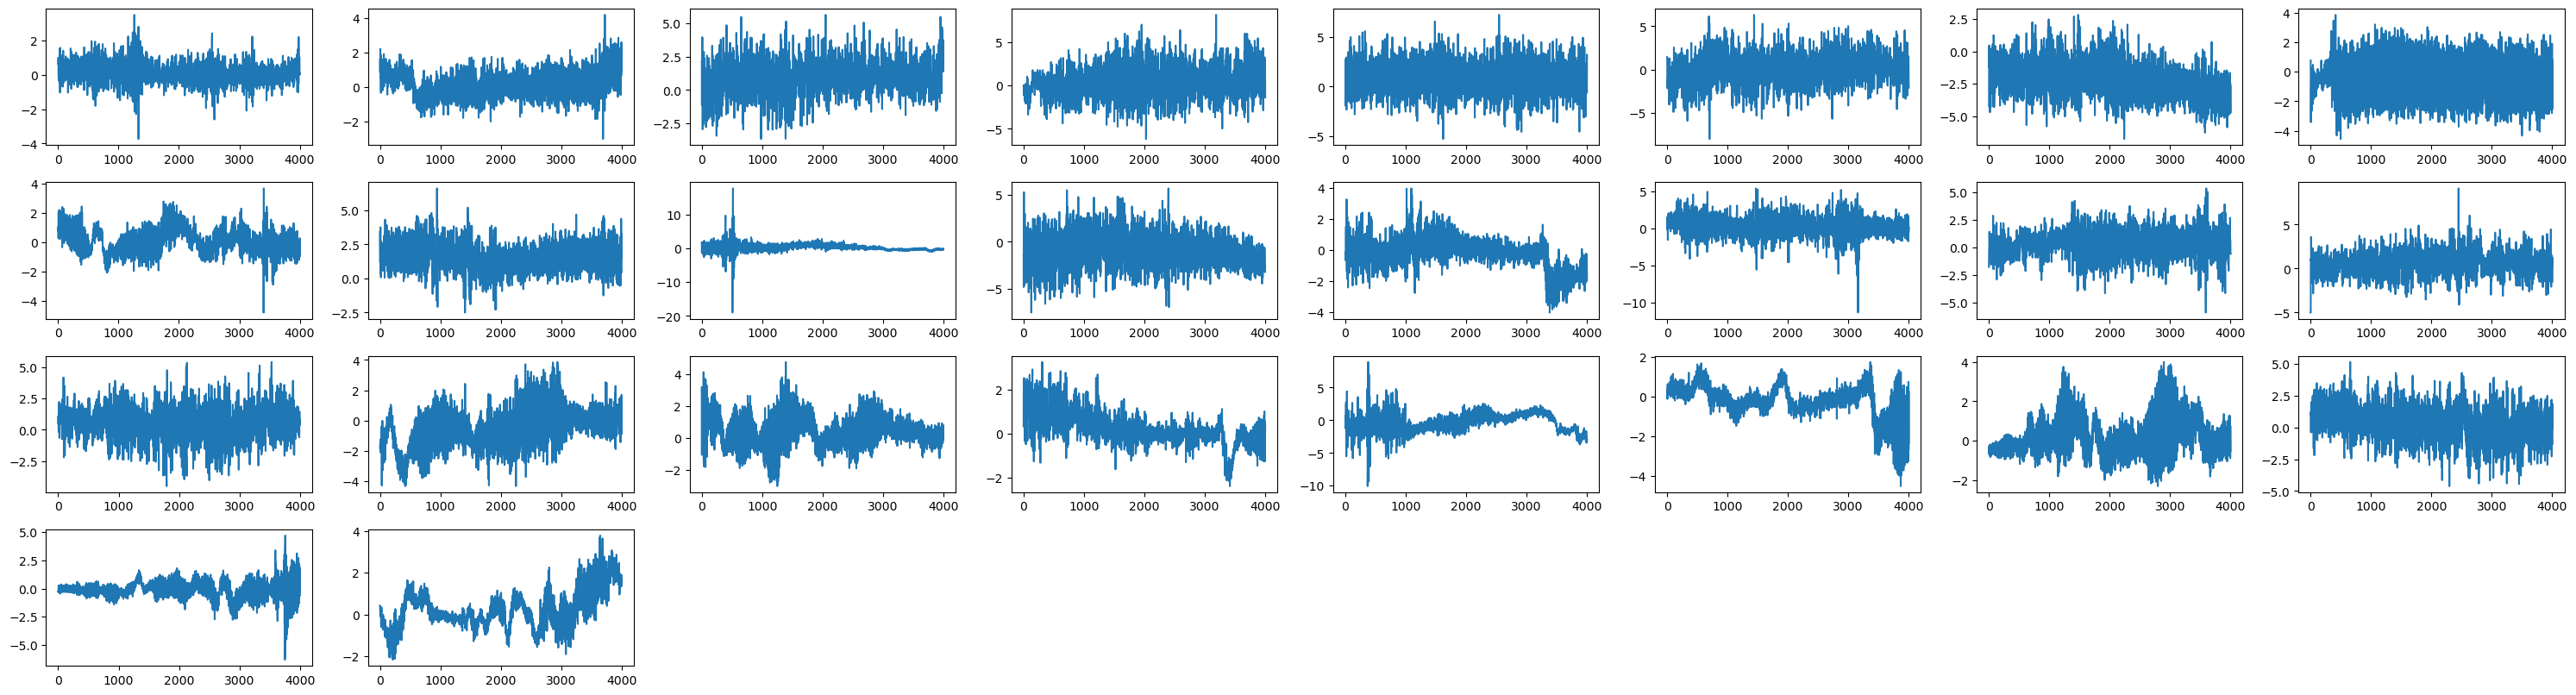

In [18]:
# Plot 12, 10, 4 = 26 non-aggressive events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==0:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

print(accel1_y[0])
 

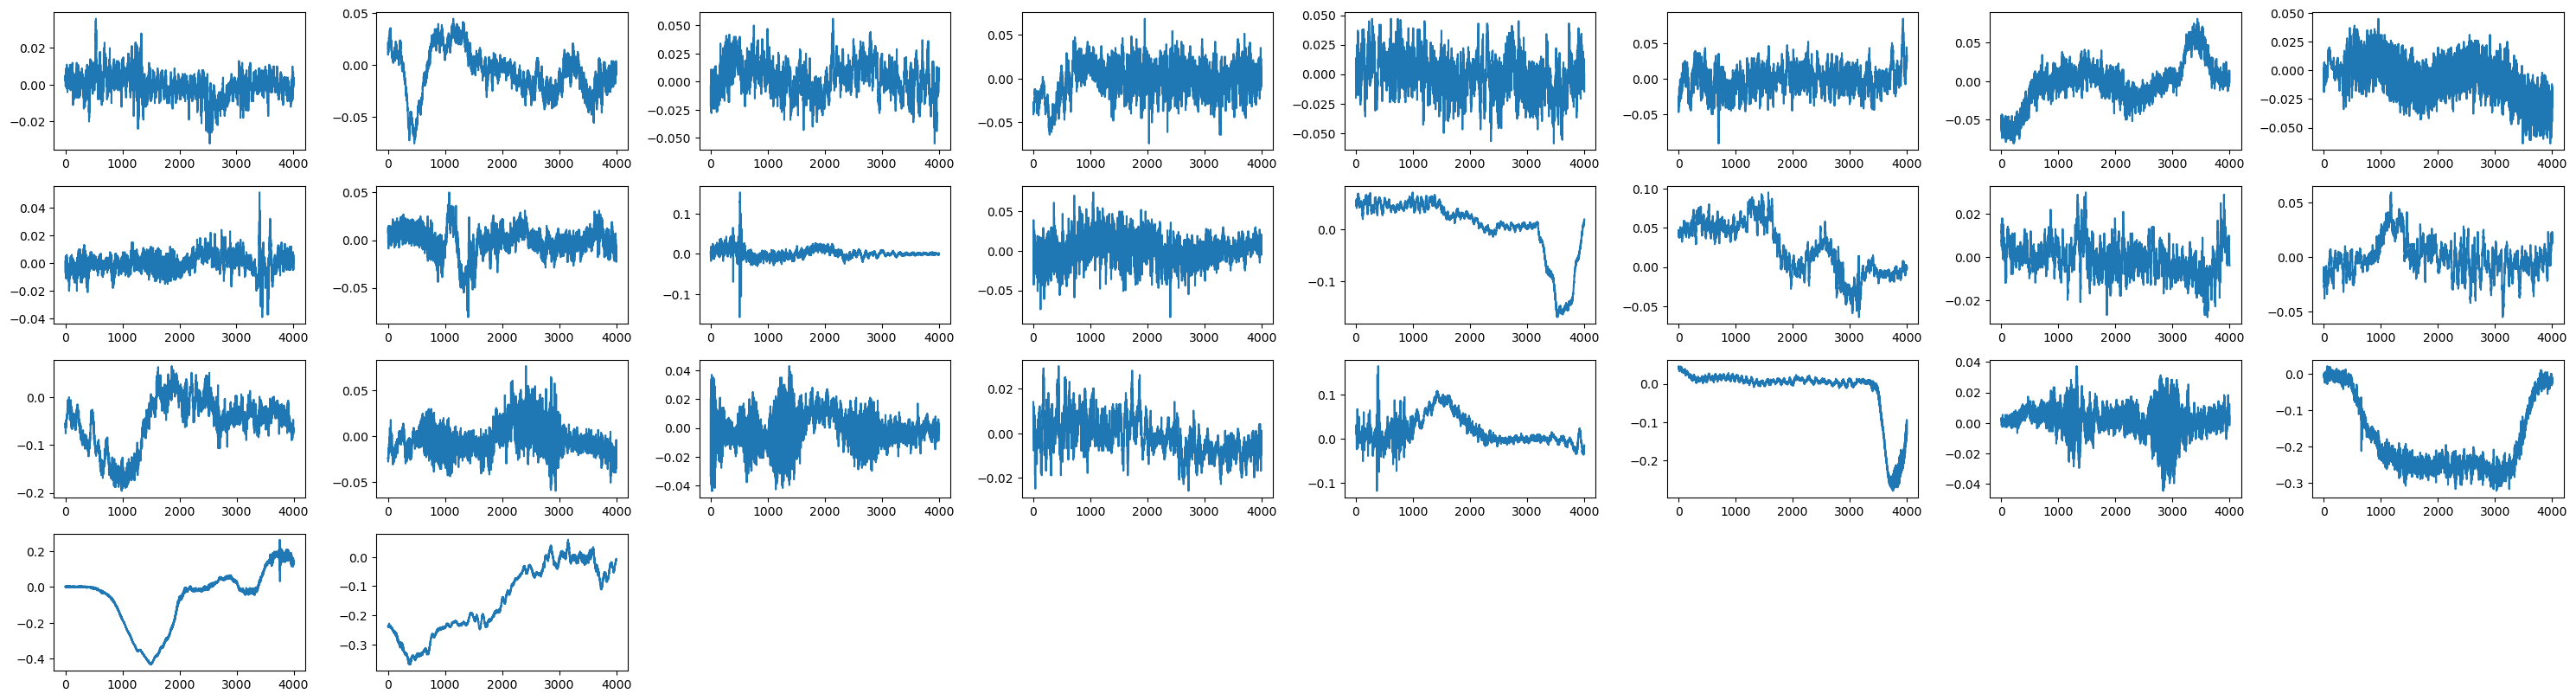

In [19]:
# Plot 12, 10, 4 = 26 non-aggressive events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==0:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive right-turn events

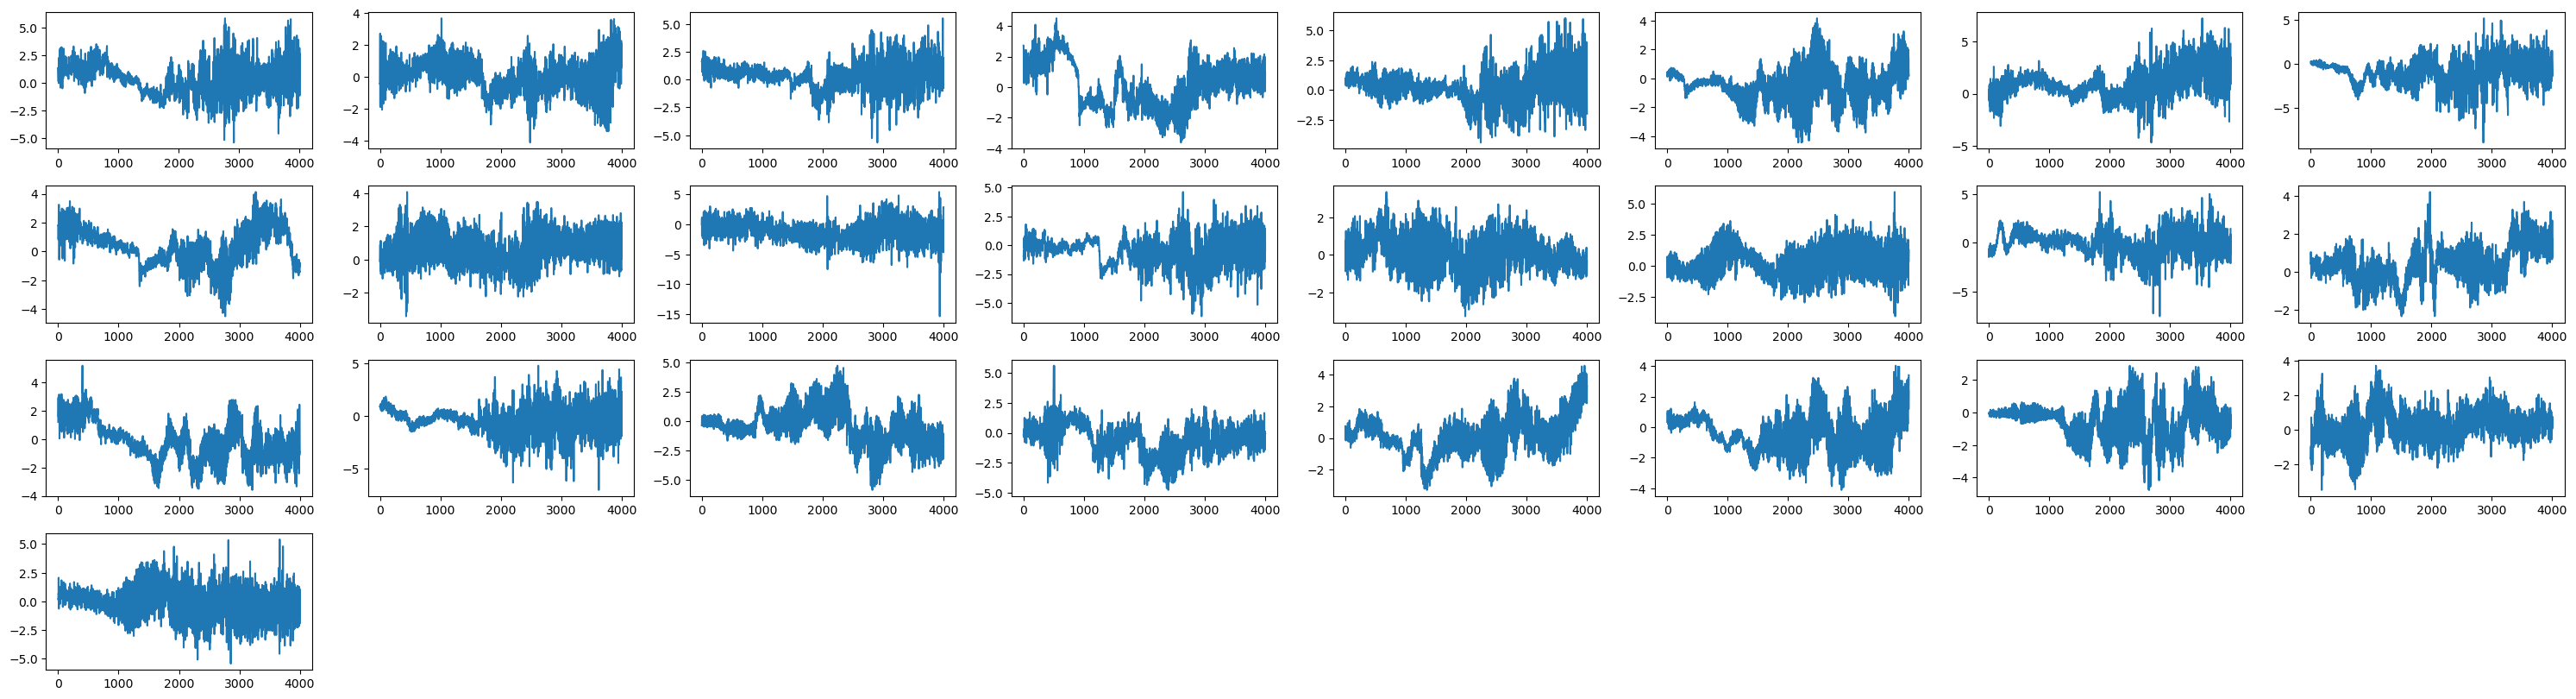

In [20]:
# Plot 11, 8, 6 = 25 aggressive right-turn events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==1:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

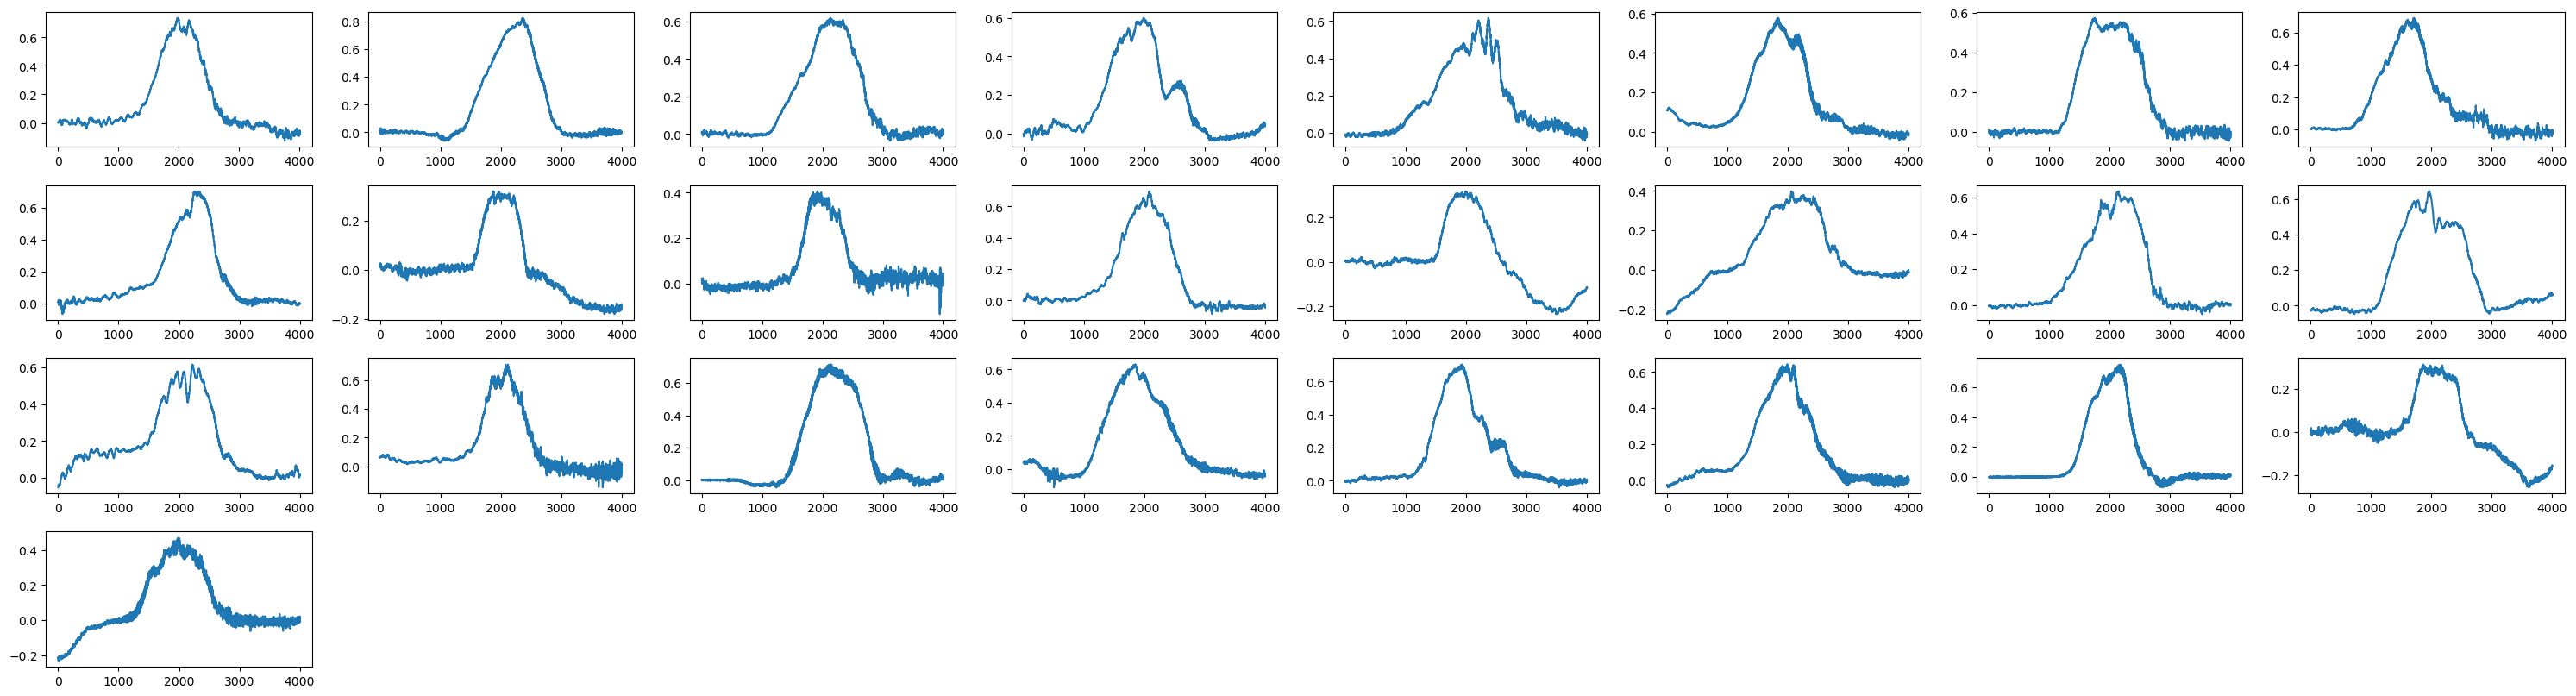

In [21]:
# Plot 11, 8, 6 = 25 aggressive right-turn events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==1:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive left-turn events

In [ ]:
#18, 5, 0 = 23 aggressive left-turn events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==2:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

: 

In [ ]:
#18, 5, 0 = 23 aggressive left-turn events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==2:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

: 

### Aggressive lane change events

In [15]:
#5, 6, 18 = 29 aggressive lane change events to the right - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==3:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

NameError: name 'rows' is not defined

In [ ]:
#5, 6, 18 = 29 aggressive lane change events to the right - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==3:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

: 

### Aggressive braking events

In [ ]:
#15, 7, 0 = 22 aggressive braking events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==4:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

: 

In [ ]:
#15, 7, 0 = 22 aggressive braking events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==4:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

: 

### Aggressive acceleration events

In [ ]:
#9, 6, 6 = 21 aggressive acceleration events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==5:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

: 

In [ ]:
#9, 6, 6 = 21 aggressive acceleration events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==5:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

: 

### Aggressive lane change events to the left

In [ ]:
#3, 4, 6 = 23 aggressive lane change events to the left - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==6:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

: 

In [ ]:
#3, 4, 6 = 23 aggressive lane change events to the left - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==6:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

: 

: 